# Ex4 - Linear Regression

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [2]:
datafile = "lausanne-appart.csv"

Read the data

In [3]:
dataset = pd.read_csv(datafile)

Display first rows

In [4]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


In [5]:
# get numpy arrays from panda objects
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values
print(type(rent_price))
print(rent_price.shape, living_area.shape)

<class 'numpy.ndarray'>
(201,) (201,)


## Part 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

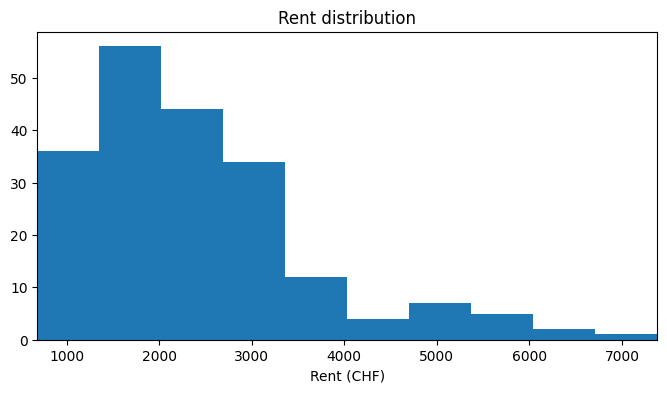

In [6]:
plt.figure(1, figsize=(8, 4))
plt.hist(rent_price)
plt.xlabel("Rent (CHF)")
plt.title("Rent distribution")
plt.xlim(np.min(rent_price), np.max(rent_price))
plt.show()

b) Plot a histogram to visualize the distribution of the living area

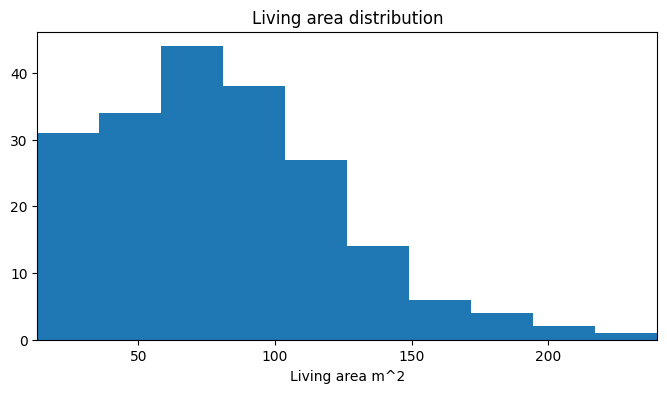

In [7]:
plt.figure(1, figsize=(8, 4))
plt.hist(living_area)
plt.xlabel("Living area m^2")
plt.title("Living area distribution")
plt.xlim(np.min(living_area), np.max(living_area))
plt.show()

c) Plot a scatter plot of renting price as a function of living area

Text(0, 0.5, 'Price')

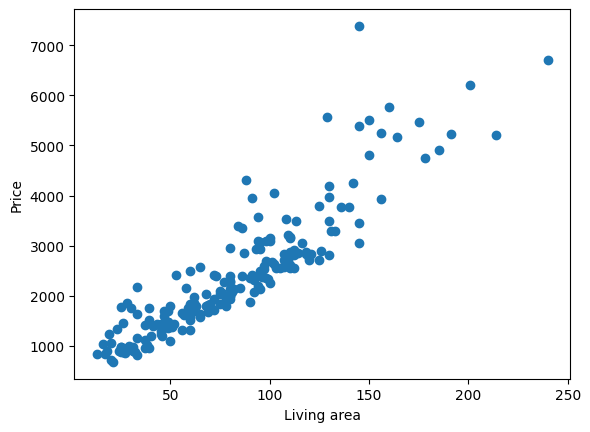

In [8]:
plt.scatter(living_area, rent_price)
plt.xlabel("Living area")
plt.ylabel("Price")

## Part 2 - Normal equations for linear regression - using numpy arrays

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of Part 1.

Theta:  [240.07710727  26.33242457]


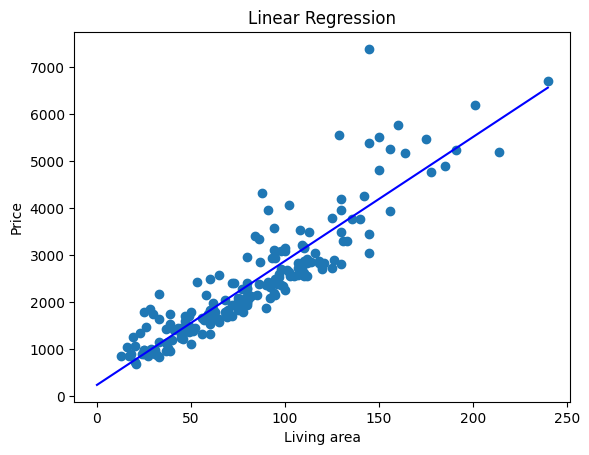

In [9]:
N = dataset.shape[0]
X = np.column_stack((np.ones(N), living_area))
y = dataset.rent_price.values

theta = inv(X.T @ X).dot(X.transpose()).dot(y)
theta_another_implementation = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
assert theta.all() == theta_another_implementation.all()
y_pred = theta[0] + theta[1] * living_area

plt.scatter(living_area, rent_price)
plt.xlabel("Living area")
plt.ylabel("Price")

x_values = np.linspace(0, living_area.max(), living_area.shape[0] )
y_values = theta[0] + theta[1] * x_values
plt.plot(x_values, y_values, color='blue', label='Line defined by theta')
plt.title("Linear Regression")

print("Theta: ", theta)

b) Compute the MSE loss according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [10]:
from sklearn.metrics import mean_squared_error

def h_theta(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

def mse_loss(x, y, y_pred):
    return np.square(h_theta(x, theta[0], theta[1]) - y).mean()


loss = mse_loss(living_area, rent_price, y_pred)
assert loss == mean_squared_error(y,y_pred)

print("MSE loss on dataset: ", loss)

MSE loss on dataset:  276069.9155957483


## Part 3 - Normal equations for linear regression - using pytorch tensors

Redo the part 2, this time using pytorch tensors.

MSE loss on dataset:  276069.9155957483


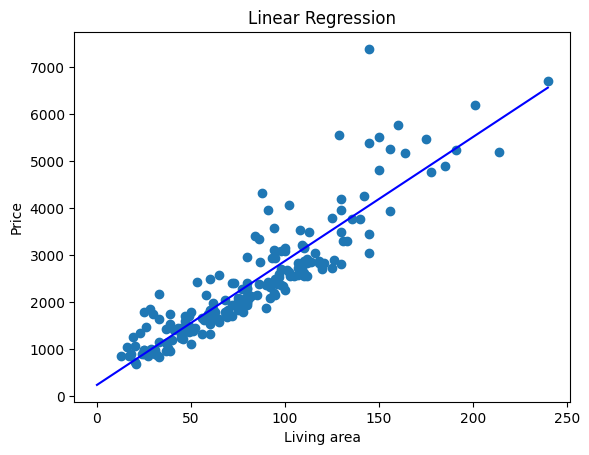

In [11]:
import torch

N = dataset.shape[0]
X = np.column_stack((np.ones(N), living_area))
X = torch.from_numpy(X)
y = dataset.rent_price.values.astype(float)
# theta_torch = (torch.mm(torch.inverse(torch.mm(torch.transpose(X,0,1)), X)),(X.transpose())).mv(y)
theta_torch = (torch.inverse(torch.matmul(torch.transpose(X,0,1), X))).matmul(X.T).mv(torch.from_numpy(y))
y_pred = theta_torch[0] + theta_torch[1] * rent_price


plt.scatter(living_area, rent_price)
plt.xlabel("Living area")
plt.ylabel("Price")

x_values = torch.linspace(0, living_area.max(), living_area.shape[0])
y_values = theta_torch[1] * x_values + theta_torch[0]
plt.plot(x_values, y_values, color='blue', label='Line defined by theta')
plt.title("Linear Regression")

loss = mse_loss(living_area, rent_price, y_pred)
print("MSE loss on dataset: ", loss)